![](img/banner.png)
%%HTML
<script src="require.js"></script>

# Image Segmentaion

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

In [1]:
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import data
from skimage.color import rgb2gray

In [2]:
img = np.random.randint(10, size=(5, 6))
img

array([[3, 4, 3, 2, 1, 0],
       [5, 8, 0, 7, 1, 8],
       [9, 5, 5, 2, 7, 6],
       [1, 2, 7, 4, 2, 5],
       [1, 4, 3, 5, 9, 4]])

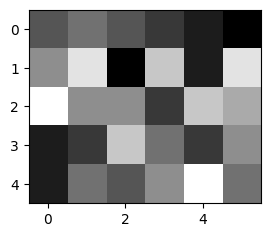

In [3]:
plt.figure(figsize=(3, 4))
plt.imshow(img, cmap=plt.cm.gray)

## Image segmentation by thresholding

In [4]:
seg_img = img > 5
type(seg_img), seg_img

(numpy.ndarray,
 array([[False, False, False, False, False, False],
        [False,  True, False,  True, False,  True],
        [ True, False, False, False,  True,  True],
        [False, False,  True, False, False, False],
        [False, False, False, False,  True, False]]))

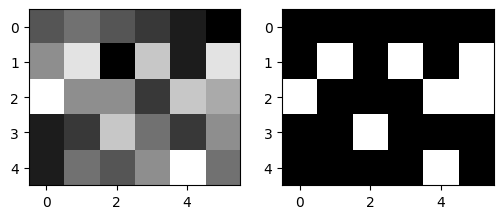

In [5]:
# plot each image ...
# ... side by side
fig = plt.figure(figsize=(6, 4))
fig.add_subplot(1, 2, 1)  # subplot one
plt.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=9)

fig.add_subplot(1, 2, 2)  # subplot two
# my data is OK to use gray colormap (0:black, 1:white)
plt.imshow(seg_img, cmap=plt.cm.gray, vmin=0, vmax=1)  # use appropriate colormap here

## Using K-means

In [6]:
integer_array = np.array([1, 2, 3, 7, 8, 9, 10])
X = integer_array.reshape(-1, 1)
# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=2)
# Fit the K-means model to the data
kmeans.fit(X)
# Get the labels assigned by the K-means algorithm
labels = kmeans.labels_
# Get the cluster cluster_centers
cluster_centers = kmeans.cluster_centers_

print(labels)
print(cluster_centers)

C:\Users\m.amintoosi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 0 0 0 0]
[[8.5]
 [2. ]]


Wrong Method!

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(img)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(labels)
print(cluster_centers)

[1 0 0 1 1]
[[7.         6.5        2.5        4.5        4.         7.        ]
 [1.66666667 3.33333333 4.33333333 3.66666667 4.         3.        ]]


C:\Users\m.amintoosi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Right Method

In [8]:
# img.flatten('F')
X = img.reshape(-1,1)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(labels)
print(cluster_centers)

[0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0]
[[2.17647059]
 [6.61538462]]


C:\Users\m.amintoosi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
seg_img_labels = labels.reshape(img.shape)
seg_img_labels.shape

(5, 6)

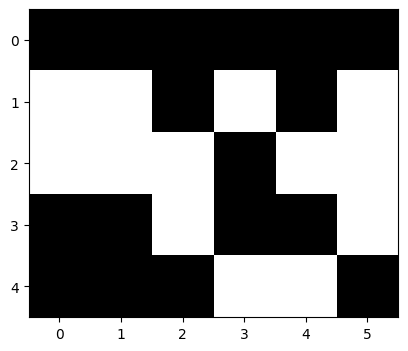

In [10]:
fig = plt.figure(figsize=(6, 4))
plt.imshow(seg_img_labels, cmap=plt.cm.gray)  

In [11]:
seg_img_labels

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 0]])

Using cluster_centers, instead of K-means labels

In [12]:
# seg_img_labels is the labels that was reshaped
seg_img_centers = np.zeros_like(img)
seg_img_centers[seg_img_labels == 0] = cluster_centers[0]
seg_img_centers[seg_img_labels == 1] = cluster_centers[1]
cluster_centers, seg_img_centers
# type(cluster_centers[0,0]), type(seg_img_centers[0,0])

(array([[2.17647059],
        [6.61538462]]),
 array([[2, 2, 2, 2, 2, 2],
        [6, 6, 2, 6, 2, 6],
        [6, 6, 6, 2, 6, 6],
        [2, 2, 6, 2, 2, 6],
        [2, 2, 2, 6, 6, 2]]))

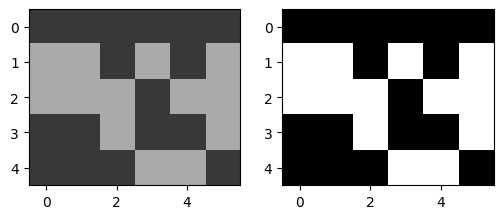

In [13]:
fig = plt.figure(figsize=(6, 4))
fig.add_subplot(1, 2, 1)  # subplot one
plt.imshow(seg_img_centers, cmap=plt.cm.gray, vmin=0, vmax=9)  # use appropriate colormap here

fig.add_subplot(1, 2, 2)  # subplot two
plt.imshow(seg_img_labels, cmap=plt.cm.gray)  # use appropriate colormap here

https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/

In [14]:
# !pip install scikit-image

In [15]:
# Sample Image of scikit-image package
coffee = data.coffee()
coffee.shape, type(coffee[0, 0, 0])

((400, 600, 3), numpy.uint8)

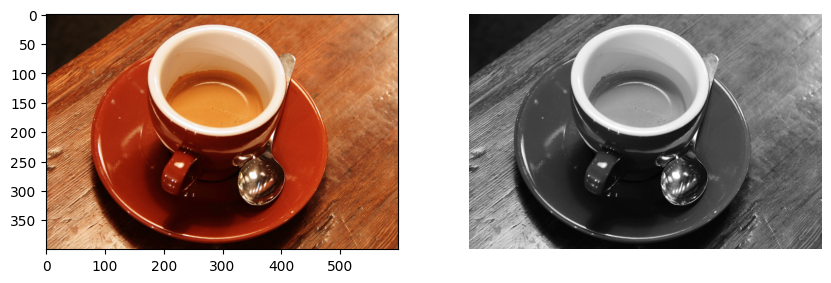

In [16]:
# Setting the plot size to 15,15
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB image to Monochrome
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)

# Displaying the sample image - Monochrome
# Format
plt.axis("off")
plt.imshow(gray_coffee, cmap="gray")

C:\Users\m.amintoosi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


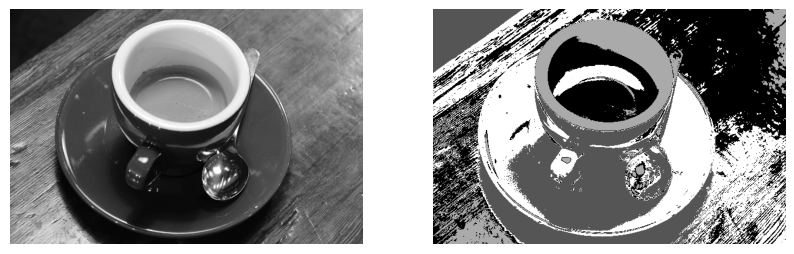

In [19]:
X = gray_coffee.reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
seg_img_labels = labels.reshape(gray_coffee.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(gray_coffee, cmap="gray")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(seg_img_labels, cmap="gray", vmin=0, vmax=3)

Using K-means centers

C:\Users\m.amintoosi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


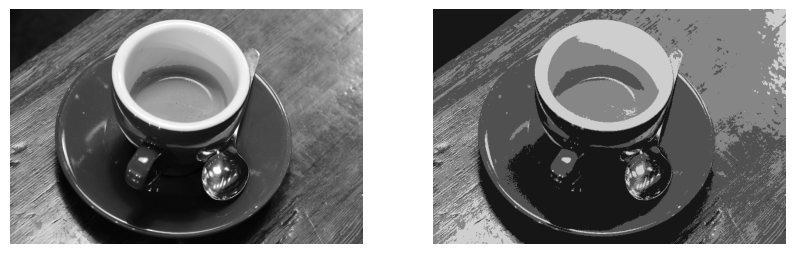

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

## New approach for replacing each pixel 
# with corresponding cluster center

seg_img_centers = cluster_centers[labels]
seg_img_centers = seg_img_centers.reshape(gray_coffee.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(gray_coffee, cmap="gray")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(seg_img_centers, cmap="gray", vmin=0, vmax=1)